In [1]:
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb
import numpy as np
import pandas as pd
from pluma.stream.georeference import Georeference
from pluma.stream.ubx import _UBX_MSGIDS
from pluma.schema import Dataset

## Notebook plotting
%matplotlib inline
plt.style.use('ggplot')

## Figure export parameters
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
import matplotlib as mpl
mpl.rcParams.update(new_rc_params)

In [2]:
stream_root_folder = r's3:///emotional-cities/data/nrg/poc-v1/London/London2022_09_22_10_30_02`

from benchmark_schemas import build_benchmarkschema_accelerometer

dataset = Dataset(
    stream_root_folder,
    datasetlabel="Accelerometer_Benchmark",
    georeference= Georeference(),
    schema=build_benchmarkschema_accelerometer)
dataset.populate_streams(autoload=True)

C:\Users\neurogears\Documents\git\EmotionalCities\pluma-analysis\pluma\io\harp.py:44: UserWarning: Harp stream file            @(AWS) --> s3://emotional-cities/data/nrg/poc-v1/TechnicalBenchmarks/EmpaticaLDRBenchmark2022_09_26_18_06_45/Streams_33 could not be found.
  warnings.warn(f'Harp stream file\


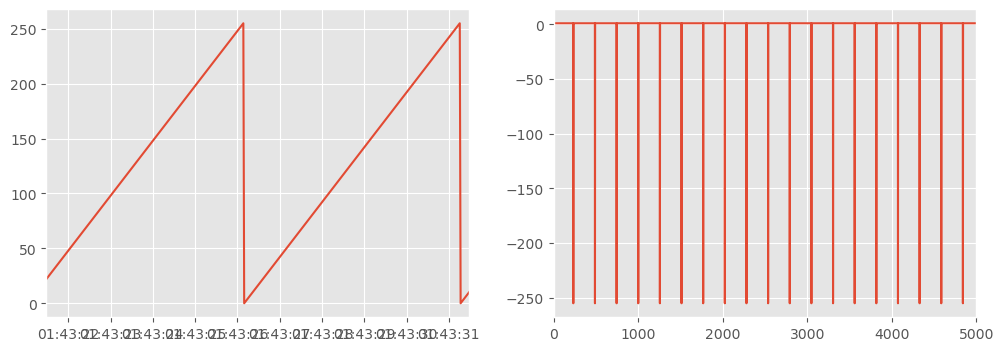

[-255.    1.]


In [10]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12,4)
axs[0].plot(dataset.streams.BioData.Accelerometer.data)
axs[0].set_xlim(dataset.streams.BioData.Accelerometer.data.index[0], dataset.streams.BioData.Accelerometer.data.index[500])

axs[1].plot(np.diff(dataset.streams.BioData.Accelerometer.data.Value.astype(float)))
axs[1].set_xlim((0, 5000))
plt.show()
print(np.unique(np.diff(dataset.streams.BioData.Accelerometer.data.Value.astype(float))))

assert np.all(dataset.streams.Accelerometer.data.index.values == dataset.streams.BioData.Accelerometer.data.index.values[:-1])

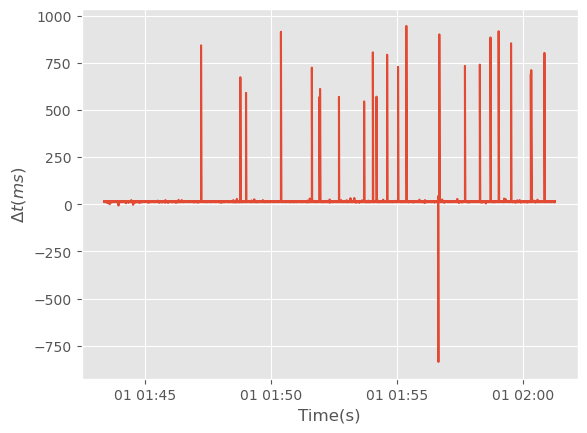

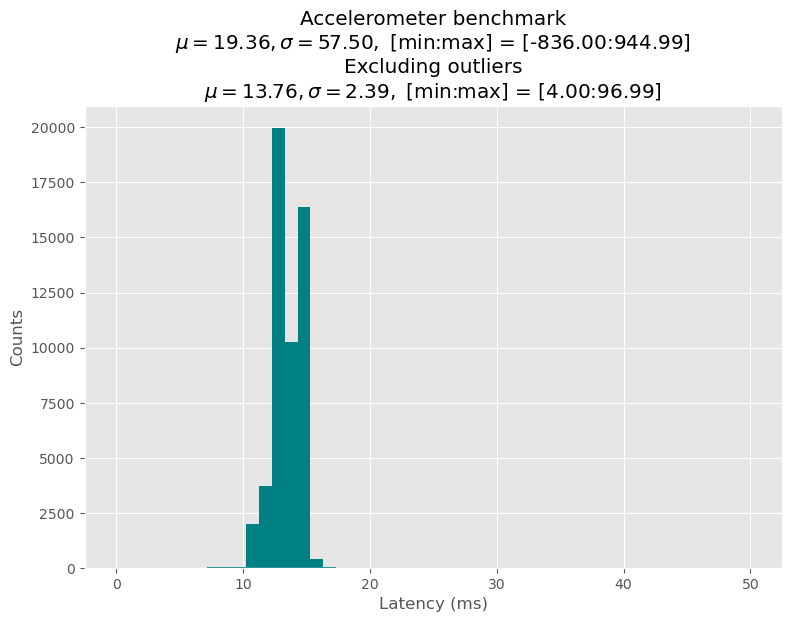

In [14]:

delta_t = dataset.streams.Accelerometer.data.index - dataset.streams.Accelerometer.data['SoftwareTimestamp']
delta_t = -delta_t / np.timedelta64(1, 'ms')
plt.figure()

plt.plot(delta_t)
plt.ylabel('$\Delta t (ms)$')
plt.xlabel('Time(s)')
plt.show()

#delta_t[(delta_t > 900) or (delta_t > 900)] = np.NaN

plt.figure(figsize= (9,6))
plt.hist(delta_t, bins = np.linspace(0, 50, 50), color= "Teal")
plt.xlabel('Latency (ms)')
plt.ylabel('Counts')
txt = (f'Accelerometer benchmark\n$\mu = {np.mean(delta_t):.2f}, \sigma = {np.std(delta_t):.2f},$ [min:max] = [{np.min(delta_t):.2f}:{np.max(delta_t):.2f}]')
delta_t = delta_t[(delta_t > 0) & (delta_t < 100)]
plt.title(txt + "\n" + f'Excluding outliers\n$\mu = {np.mean(delta_t):.2f}, \sigma = {np.std(delta_t):.2f},$ [min:max] = [{np.min(delta_t):.2f}:{np.max(delta_t):.2f}]')

plt.show()